# Example 9 - Calculate Open Circuit Resistor and Element Resistor

In [1]:
from CircuitCalculator.SimpleCircuit.styles.styling import select
select(style='DIN')
from CircuitCalculator.SimpleCircuit import Elements as sce
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
import sympy as sp
from CircuitCalculator.Circuit import impedance

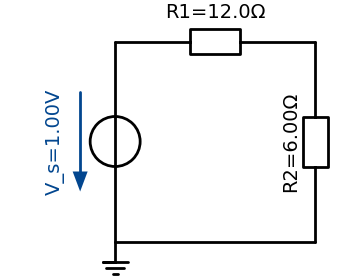

In [2]:
with sce.Schematic(unit=4) as schematic:
    schematic += sce.VoltageSource(name='V_s', V=1, reverse=True)
    schematic += sce.Resistor(name='R1', R=12).right()
    schematic += sce.Node(name='2')
    schematic += sce.Resistor(name='R2', R=6).down()
    schematic += sce.Line().left()
    schematic += sce.Ground()
circuit = circuit_translator(schematic)


In [3]:
R = impedance.open_circuit_impedance(circuit, '2', '0')[0].real
print(f'{R=:4.2f}Ohm')

R=4.00Ohm


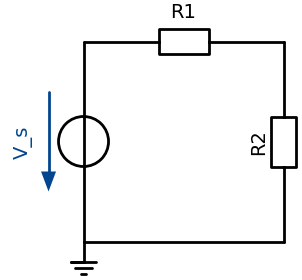

In [4]:
with sce.Schematic(unit=4) as schematic:
    schematic += sce.VoltageSource(name='V_s', reverse=True)
    schematic += sce.Resistor(name='R1').right()
    schematic += sce.Node(name='2')
    schematic += sce.Resistor(name='R2').down()
    schematic += sce.Line().left()
    schematic += sce.Ground()
circuit = circuit_translator(schematic)

In [5]:
R = impedance.symbolic_open_circuit_impedance(circuit, '2', '0')
R

1.0*R1*R2/(1.0*R1 + 1.0*R2)

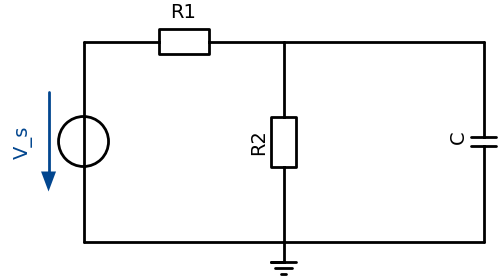

In [6]:
with sce.Schematic(unit=4) as schematic:
    schematic += sce.VoltageSource(name='V_s', reverse=True)
    schematic += sce.Resistor(name='R1').right()
    schematic += sce.Node(name='2')
    schematic += (R2:=sce.Resistor(name='R2').down())
    schematic += sce.Line().left()
    schematic += sce.Line().right().at(R2.start)
    schematic += sce.Capacitor(name='C').down()
    schematic += sce.Line().left()
    schematic += sce.Ground()
circuit = circuit_translator(schematic)

In [7]:
circuit = circuit_translator(schematic)
R = impedance.symbolic_element_impedance(circuit, 'C')
R

1.0*R1*R2/(1.0*R1 + 1.0*R2)